In [1]:
import pandas as pd
from pandas import Series,DataFrame

titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Questions

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
5.) What factors helped someone survive the sinking?

# Answer to Question 1
Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

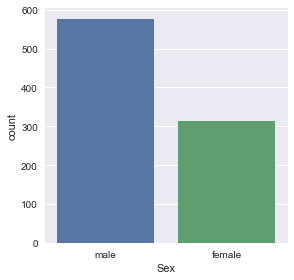

In [4]:
sns.factorplot('Sex',data=titanic_df,kind='count') #factoplot good for one columns - countrs

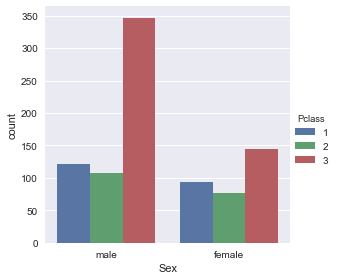

In [5]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

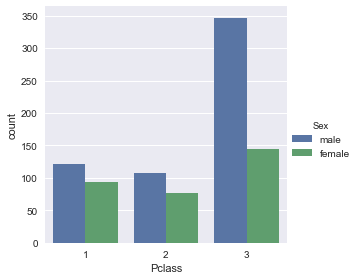

In [6]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [7]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
# it performs  passenger = ['Age','Sex'], age,sex = ['Age','Sex'] , check if , return

In [9]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


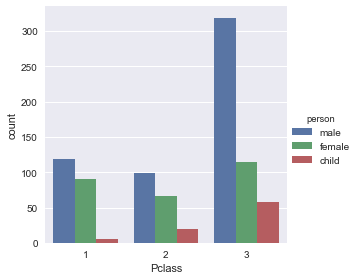

In [10]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

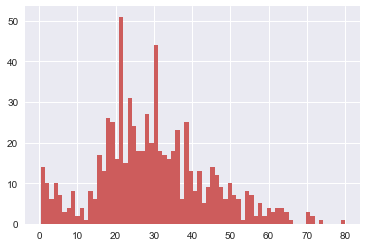

In [11]:
titanic_df['Age'].hist(bins=70,color='Indianred')

In [12]:
titanic_df['Age'].mean()

29.69911764705882

In [13]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

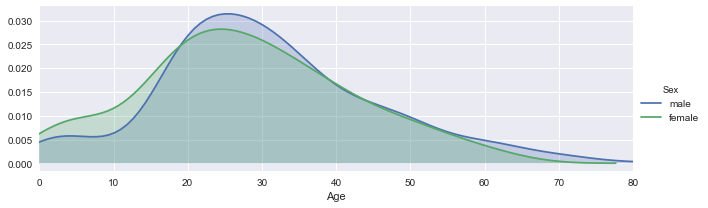

In [14]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=3) #allows multiple plots
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

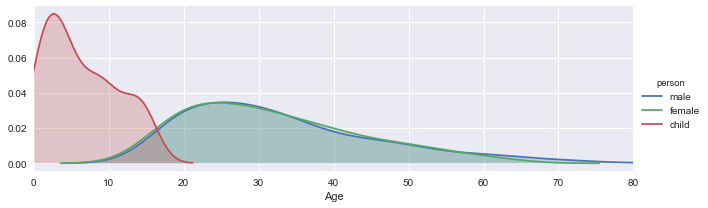

In [15]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=3) #allows multiple plots
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

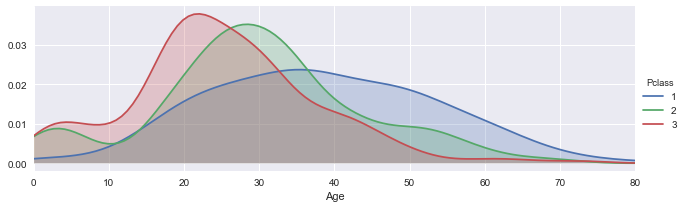

In [16]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=3) #allows multiple plots
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

# Answer to Question 2
What deck were the passengers on and how does that relate to their class?

In [17]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [18]:
deck = titanic_df['Cabin'].dropna()  # to check for the data type of the object: type(deck)
deck.head()


1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [19]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels,columns =['Cabin'])

cabin_df.sort_values(['Cabin'],inplace=True)


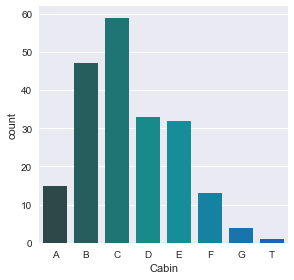

In [20]:
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

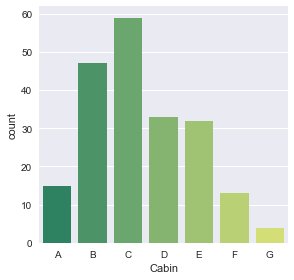

In [21]:
cabin_df = cabin_df[cabin_df.Cabin != 'T'] 
# removed T from the cabin column
# Note: cabin_df.Cabin = cabin_df['Cabin']


sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')
# for pallete check matplotlib.org/users/colormaps.html

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
# I start again in order to make a dataframe with columns =[Pclass , Cabin]

deck = titanic_df['Cabin']

In [24]:
levels = []

for level in deck:
    if pd.isnull(level) == False:
        levels.append(level[0]) # when cabin is Not null(nan) append first letter to the list
    else:
        levels.append(np.nan) # when cabin is null(nan) append nan to the list

In [25]:
Pclass_df = titanic_df['Pclass'] # series with pclass

In [26]:
cabin_df = DataFrame(levels,columns =['Cabin']) #dataframe with cabin

In [27]:
sb_df = pd.concat([Pclass_df,cabin_df],axis=1) # concatenate the two
sb_df.head()

,Pclass,Cabin
0,3,NaN
1,1,C
2,3,NaN
3,1,C
4,3,NaN


In [28]:
sb_df = sb_df.dropna() # drop rows where either pclass or column in nan
sb_df.head()

,Pclass,Cabin
1,1,C
3,1,C
6,1,E
10,3,G
11,1,C


In [29]:
sb_df.drop(sb_df[sb_df.Cabin == 'T'].index,inplace=True) # drop rows where column[cabin] = 'T' 
sb_df.head()

,Pclass,Cabin
1,1,C
3,1,C
6,1,E
10,3,G
11,1,C


In [30]:
sb_df.sort_values(['Cabin'],inplace=True) # sorting the dataframe according to the column[cabin]

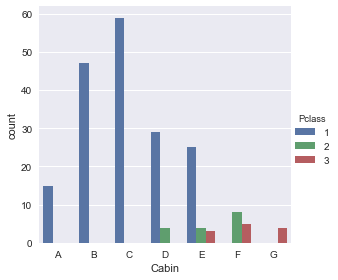

In [31]:
sns.factorplot('Cabin',data=sb_df,hue='Pclass',kind='count')

In [32]:
# or if you dont want to sort your dataframe you can sort the plot directly

# sort the sb_df to its index in order to put it in each initial form
sb_df.sort_index(inplace=True)
sb_df.head()

,Pclass,Cabin
1,1,C
3,1,C
6,1,E
10,3,G
11,1,C


In [33]:
xorder = sb_df.Cabin.unique() # find the unique items in the column[cabin]

In [34]:
xorder=filter(lambda x: pd.isnull(x) == False, xorder) # remove the nan from the xorder if it exists

In [35]:
xorder = sorted(xorder) #sorting the list
xorder

['A', 'B', 'C', 'D', 'E', 'F', 'G']

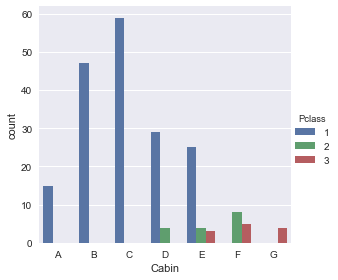

In [36]:
sns.factorplot('Cabin',data=sb_df,hue='Pclass',kind='count',order=xorder)

# Answer to Question 3
Where did the passengers come from?

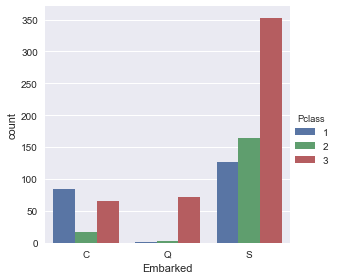

In [37]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count', order=['C','Q','S'])

# Answer to Question 4
Who was along and who was with family?

In [38]:
'''
SibSp - siblings , Parch - parents or children 
'''

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [39]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [40]:
titanic_df['Alone'].loc[titanic_df.Alone >0] = 'With Family' #locates and replace > 0 -> With Family

titanic_df['Alone'].loc[titanic_df.Alone == 0] ='Alone' #located and replace 0 -> Alone

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

C:\Users\Ioannis Basmatzidis\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


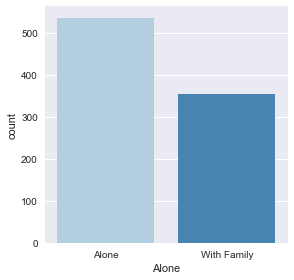

In [42]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count',order=sorted(titanic_df.Alone.unique()))

# Answer to Question 5
What factors helped someone survive the sinking?

In [43]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'}) # changes 0 to no and 1 to yes

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


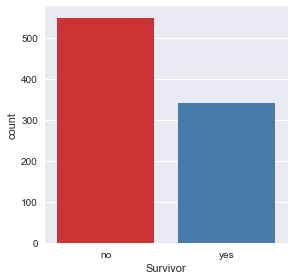

In [45]:
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')

In [46]:
#lets check if class does matter

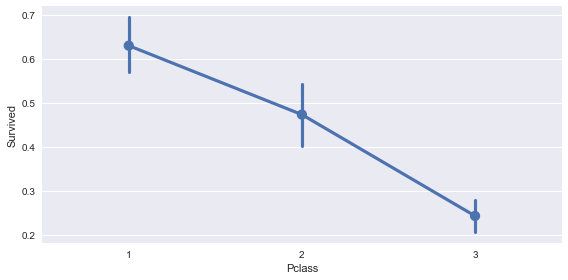

In [47]:
sns.factorplot('Pclass','Survived',data=titanic_df,size=4,aspect=2)

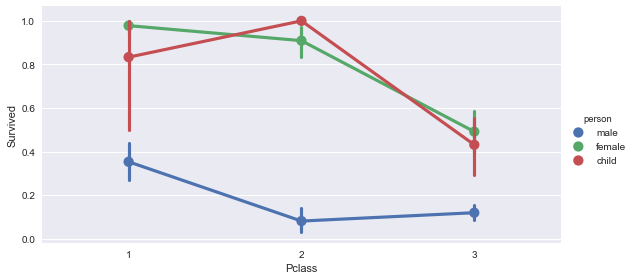

In [48]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person',size=4,aspect=2)

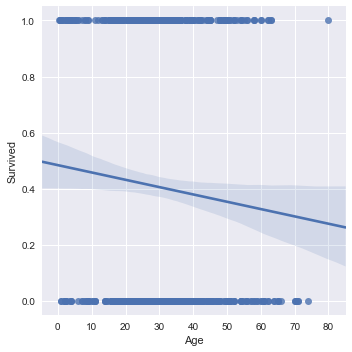

In [49]:
sns.lmplot('Age','Survived',data=titanic_df) # lmplot is regression plot with facetgrid

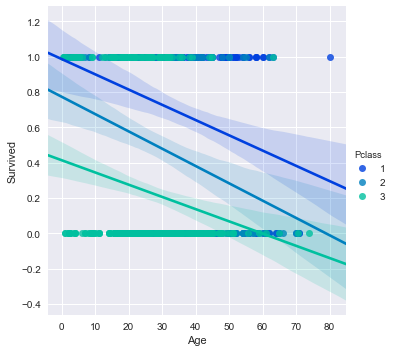

In [50]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter')

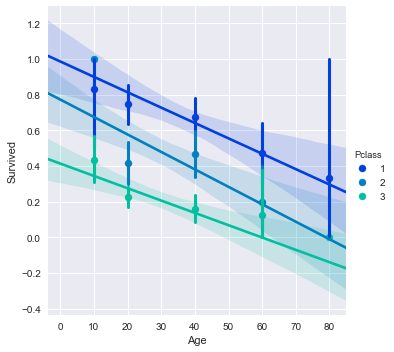

In [51]:
generations = [10,20,40,60,80] # create bins for better visualisation

sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations)

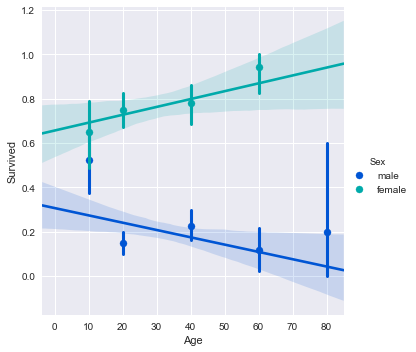

In [52]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

# the vertical lines are showing standard deviation

# More Questions
##6.) Did the deck have an effect on the passengers survival rate? Did the answer match up with your intuition?
##7.) Did having a family member increase the odds of surviving the crash?

# Answer to Question 6
Did the deck have an effect on the passengers survival rate? Did the answer match up with your intuition?

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [76]:
survived_df = titanic_df['Survived'] # series with Survived

sbnew_df = pd.concat([survived_df,cabin_df],axis=1) # concatenate the two

sbnew_df = sbnew_df.dropna() # drop rows where either Survived or column in nan

sbnew_df.drop(sbnew_df[sbnew_df.Cabin == 'T'].index,inplace=True) # drop rows where column[cabin] = 'T' 

sbnew_df.head()

,Survived,Cabin
1,1,C
3,1,C
6,0,E
10,1,G
11,1,C


In [77]:
sbnew_df.sort_values(['Cabin'],inplace=True)
sbnew_df.head()

,Survived,Cabin
96,0,A
174,0,A
209,1,A
445,1,A
647,1,A


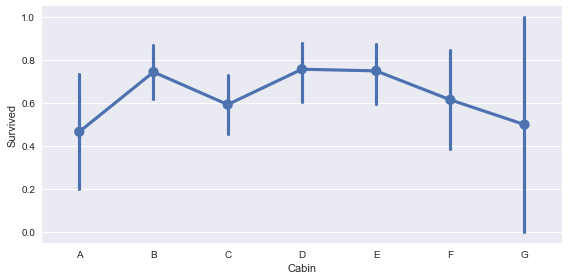

In [78]:
sns.factorplot('Cabin','Survived',data=sbnew_df,size=4,aspect=2)

In [79]:
sbnew_df['Survivor'] = sbnew_df.Survived.map({0:'no', 1:'yes'})
sbnew_df.head()

,Survived,Cabin,Survivor
96,0,A,no
174,0,A,no
209,1,A,yes
445,1,A,yes
647,1,A,yes


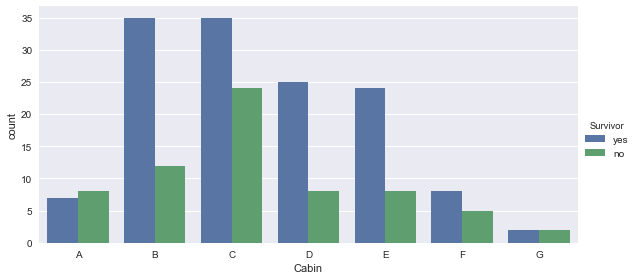

In [81]:
sns.factorplot('Cabin',data=sbnew_df,hue='Survivor',size=4,aspect=2,kind='count',hue_order=['yes','no'])

# Answer to Question 7
Did having a family member increase the odds of surviving the crash?

In [119]:
sbnew_df = titanic_df.filter(['Alone','Survived']) # this does NOT create a copy, it creates a NEW dataframe

In [120]:
sbnew_df._is_view # check if it is a copy or not

False

In [121]:
sntest_df = titanic_df.iloc[:,13:15]

# .iloc = .ix -> [rows,columns] , rows and columns INtegers
# .loc -> [rows,columns], rows and columns LABELS

In [122]:
sbnew_df._is_view # check if it is a copy or not

False

In [123]:
sbnew_df.head()

,Alone,Survived
0,With Family,0
1,With Family,1
2,Alone,1
3,With Family,1
4,Alone,0


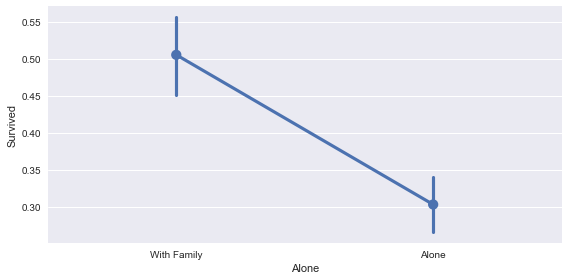

In [124]:
sns.factorplot('Alone','Survived',data=sbnew_df,size=4,aspect=2)

In [125]:
sbnew_df['Survived']=sbnew_df.Survived.map({0:'no',1:'yes'})

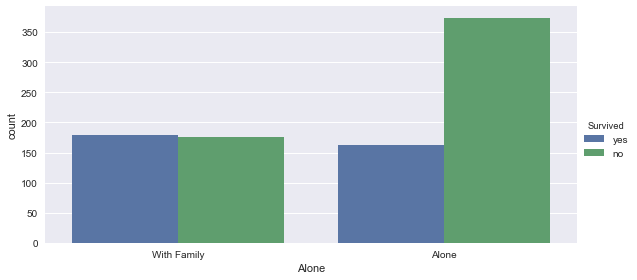

In [126]:
sns.factorplot('Alone',hue='Survived',data=sbnew_df,size=4,aspect=2,kind='count',
              hue_order=['yes','no'])

In [127]:
sbnew_df['Survived']=sbnew_df.Survived.map({'no':0,'yes':1})